In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# From here starting the analysis

**df_train is training set and df_test is test set**

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**As there are mssing values in Age column we need to fill them with median value**

In [7]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**lets plot the survival and death of both male and female**

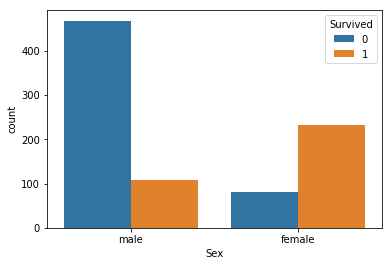

In [9]:
sns.countplot(x = 'Sex',hue = 'Survived',data = df_train)

**as from plot it is clear that male died more in comparison to female**

**lets check ratio of male survived in comparison to female**

In [10]:
 df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


**Definitly female survivors were more in comparsion to male**

**Lets check the age factor for survival**

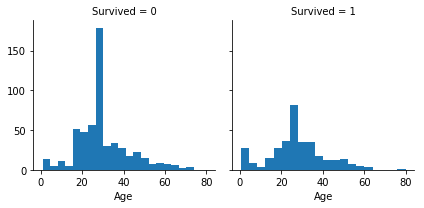

In [11]:
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [12]:
train_test_data = [df_train,df_test]

**dividing age group**
**child: 0,
young: 1,
adult: 2,
mid-age: 3,
senior: 4**

In [13]:
for age in train_test_data:
    age.loc[age['Age'] <= 15 , 'Age'] = 0,
    age.loc[(age['Age'] > 15) & (age['Age'] <= 25), 'Age'] = 1,
    age.loc[(age['Age'] > 25) & (age['Age'] <= 40), 'Age'] = 2,
    age.loc[(age['Age'] > 40) & (age['Age'] <= 60), 'Age'] = 3,
    age.loc[(age['Age'] > 60) ,'Age'] = 4
 
    

**This shows that children had highest survival rate and old age had least survival rate**

In [14]:
AgeGroup = df_train[['Age','Survived']].groupby(['Age'], as_index = False).mean()

In [15]:
AgeGroup

,Age,Survived
0,0.0,0.590361
1,1.0,0.344037
2,2.0,0.370455
3,3.0,0.390625
4,4.0,0.227273


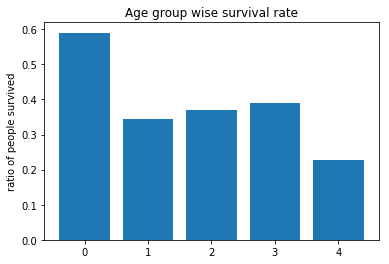

In [16]:
x1 = AgeGroup['Age']
y1 = AgeGroup['Survived']
plt.ylabel('ratio of people survived')
#plt.xlabel('AgeGroup')
plt.title('Age group wise survival rate')
plt.bar(x1,y1,alpha = 1)
plt.show()

**Children were highest survovors**

**Lets see how their classes affected their survival**

In [17]:
Class = df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean()

In [18]:
Class

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


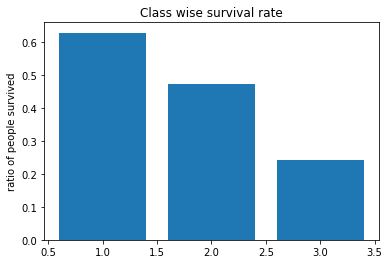

In [19]:
x1 = Class['Pclass']
y1 = Class['Survived']
plt.ylabel('ratio of people survived')
#plt.xlabel('AgeGroup')
plt.title('Class wise survival rate')
plt.bar(x1,y1,alpha = 1)
plt.show()

**Obviously upper class people had higher survial rate**

**People who had a family or spouses and alone people survival rate**

In [20]:
spouses_siblings = df_train[['SibSp','Survived']].groupby(['SibSp'], as_index = False).count()

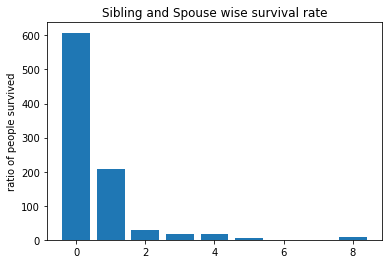

In [21]:
x1 = spouses_siblings['SibSp']
y1 = spouses_siblings['Survived']
plt.ylabel('ratio of people survived')
#plt.xlabel('AgeGroup')
plt.title('Sibling and Spouse wise survival rate')
plt.bar(x1,y1,alpha = 1)
plt.show()

In [22]:
parent_child =  df_train[['Parch','Survived']].groupby(['Parch'], as_index = False).mean()

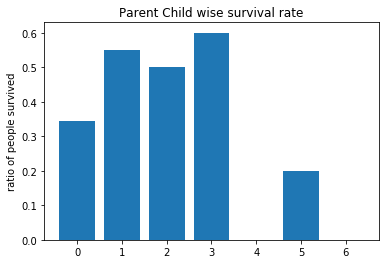

In [23]:
x1 = parent_child['Parch']
y1 = parent_child['Survived']
plt.ylabel('ratio of people survived')
#plt.xlabel('AgeGroup')
plt.title('Parent Child wise survival rate')
plt.bar(x1,y1,alpha = 1)
plt.show()

**It can be observed that people who dont have any any sbling or spouse survived more than people who had sibling or spouse**

In [24]:
df_train[['SibSp','Survived']].groupby(['SibSp'], as_index = False).count()

,SibSp,Survived
0,0,608
1,1,209
2,2,28
3,3,16
4,4,18
5,5,5
6,8,7


In [25]:
df_train[['Parch','Survived']].groupby(['Parch'], as_index = False).count()

,Parch,Survived
0,0,678
1,1,118
2,2,80
3,3,5
4,4,4
5,5,5
6,6,1


**As we saw that sex is a feature that affected survival so we can include this feature in our model**

In [26]:
sex_mapping = {'male': 0, 'female': 1}
for i in train_test_data:
    i['Sex'] = i['Sex'].map(sex_mapping)

In [27]:
embarked_mapping = {'S': 0, 'Q': 1, 'C' : 2}
for j in train_test_data:
    j['Embarked'] = j['Embarked'].map(embarked_mapping)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0.0


**Title**

In [28]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand = False)

In [29]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,2.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0.0,Mr


In [30]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [31]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,2.0,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0.0,0


In [32]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,7.8292,NaN,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,4.0,0,0,240276,9.6875,NaN,1,0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,12.2875,NaN,0,2


In [33]:
df_train = df_train.drop('Name',axis = 1)
df_test = df_test.drop('Name',axis = 1)

In [34]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0.0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,2.0,2
2,3,1,3,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0.0,0


In [35]:
df_train['Embarked']=df_train['Embarked'].fillna(0)

In [36]:
final_train=df_train[['PassengerId','Pclass','Sex','Age','Title']]
final_test=df_test[['PassengerId','Pclass','Sex','Age','Title']]
target=df_train['Survived']
final_test['Age'] = final_test['Age'].fillna(df_train['Age'].median())
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Title          418 non-null int64
dtypes: float64(1), int64(4)
memory usage: 16.4 KB


c:\users\kruti\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Modelling

In [37]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [38]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=7, shuffle=True, random_state=0)

In [39]:
clf = KNeighborsClassifier(n_neighbors = 15)
scoring = 'accuracy'
score = cross_val_score(clf, final_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.53125    0.5390625  0.60629921 0.59055118 0.51968504 0.57480315
 0.52755906]


In [40]:
round(np.mean(score)*100, 2)

55.56

In [41]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,final_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

c:\users\kruti\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kruti\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kruti\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureW

[0.5546875  0.6484375  0.62992126 0.64566929 0.57480315 0.5984252
 0.5984252 ]


c:\users\kruti\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\kruti\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [42]:

round(np.mean(score)*100,2)

60.72

In [43]:

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, final_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7421875  0.796875   0.7480315  0.80314961 0.76377953 0.79527559
 0.82677165]


In [44]:
round(np.mean(score)*100,2)

78.23

In [45]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, final_train, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.765625   0.7421875  0.7480315  0.77952756 0.75590551 0.78740157
 0.81102362]


In [46]:
round(np.mean(score)*100,2)

77.0

In [47]:
clf =  GaussianNB()
clf.fit(final_train, target)
prediction = clf.predict(final_test)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [48]:
len(prediction)

418

In [49]:
submission=pd.DataFrame({
    "PassengerId":final_test["PassengerId"],
    "Survived":prediction
})

submission.to_csv('submission.csv', index = False)